![zebrains_logo](../../images/logo-zebrains-dark.svg)
## Кафедра «Интеллектуальных технологий в информационных системах»

### Лабораторная работа 3: Титаник

![](../../images/titanic2.jpg) 

В данной лабораторной работе вы:
* Загрузите данные
* Проанализируете данные
* Познакомитесь с Feature Engineering - техниками, позволяющими создавать новые данные, на основе существующих
* Натренируете алгоритм машинного обучения

## Полезные ссылки

* ru.wikipedia.org/wiki/Крушение_«Титаника»

**Визуализация**

* python-graph-gallery.com -  Галлерея питоновских графиков. Если вы хотите нарисовать график, но не знаете, что лучше подойдет - этот сайт может помочь. 
* seaborn.pydata.org/examples - Галлерея библиотеки seaborn
* matplotlib.org/stable/gallery - Галлерея библиотеки matplotlib

## Задание:
1. **Заполнить ячейки вида**

```python
# место для кода
```

Не стесняйтесь создавать дополнительные ячейки, писать комментарии, оформлять ноутбук. 
Рассматривайте это как интерактивный конспект, где вы что-то пишете на полях, выделяете основные места хайлайтером и т.п.
В конечном итоге, смысл всего этого в том, что бы вам самим было понятно.

2. **Залить результат работы на Kaggle**

**Отчет**
* Работа оценивается по коду, который вы впишете в ячейки. И результату исполнения этого кода. 

* А так же по комментариям и заметкам, которые  вы можете и должны, в некоторых случаях, оставить в ноутбуке.


* В репозиторий залейте изменения ячейки вместе с результатом их исполнения (то, что разварачивается внизу, когда вы запускаете ячейку).
* Учтите, что ваш код должен правильно отработать, если ноутбук будет полностью перезапущен. Будьте внимательны. Иногда случается так, что код в ячейке изменили, а запустить забыли. В выводе ячейки остался старый результат. Или, в процессе разработки, запускаются ячейки в разной последовательности. И запуск всех ячеек сверху - вниз не дает желаемый результат. Советуем вам перед сдачей перезапустить ноутбук полностью и удостовериться, что все сработало так, как вы это задумывали.

**Скриншоты прикреплять в этой лабораторной не нужно**

# Титаник


Данная лабора

## Этапы

1. Постановка задачи, четкое определение целевой переменной
2. Сбор данных
3. Анализ данных
4. Обработка данных
5. Тренировка моделей
6. Выбор лучшей модели, подведение итогов

Обычно, этапы для дата саентиста следуют в подобном порядке. Друг за другом. Однако, в реальных проектах вы будете постоянно возвращаться на предыдущие этапы, перепрыгивать промежуточные этапы и т.д. 

Но когда весь необходимый анализ проведен и вы знаете, чего ожидать от данных - следует стремиться к тому, что бы строить надежный data-pipeline. Что бы не заботиться о том, как обрабатываются данные. А заниматься экспериментами с моделью.

На этапе, когда вы уже уверены в модели - вам нужно позаботиться об автоматизации предсказания. Т.е. создать программу, где на вход вы подаете данные, а на выходе получаете ответ. Не задумываясь о том, что происходит в самой программе. Т.е. модель *черный ящик*.

## Постановка задачи, четкое определение целевой переменной

Данное соревнование представлено на сайте Kaggle. Внимательно прочитай описание по этой ссылке [described here at Kaggle](https://www.kaggle.com/c/titanic).

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

Также, мы уже на данном этапе можем получить некоторые инсайты о том, что нас ждет при решении задачи. Всё по той же ссылке [Kaggle competition description page here](https://www.kaggle.com/c/titanic). 
Вот некоторые из зацепок:

- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

## Наука о данных

Приемы, применяющиеся при исследовании данных

**Классификация** Мы хотим классифицировать или категоризировать наши данные. Т.е. выявить структуры, обнаружить паттерны. Также, нам бы хотелось понять, как отношение данных к определенному классу связано с переменной, которую мы хотим предсказать. 


**Корреляция** У нас есть некоторый набор параметров (features) \ фичей. В данной задаче - возраст, пол, тип билета, кабина и т.д. И нам бы хотелось знать, существует ли корреляция между этими параметрами и выживанием человека? Насколько сильна эта корреляция? А в каких комбинациях? Если мы поменяем один параметр - существенно ли изменится общая картина? 

Возможно, мы даже захотим узнать корреляцию не только с нашей целевой переменной (Выживание), но и между параметрами. Например, кто чаще берет с собой детей в круиз? Отцы, матери или Пары? 

Знания, полученные при анализе корреляций, могут привести нас к созданию своих параметров. Новых колонок, которых не было в изначальном датасете. Не говоря уже о редактировании и дополнении старых фичей.


**Конвертация** Перед тренировкой модели почти всегда требуется обработать данные. Датасет редко бывает чистым. Чистым настолько, что бы мы сразу могли загнать его в модель. Код просто выдаст ошибку. В зависимости от алгоритма, который мы выберем для тренировки, может потребоваться конвертировать один тип данных в другой. Например, перевести все категориальные данные в числовые. Т.е. закодировать категории цифрами. 

P.S. даже, если исследование не предполагает тренировку моделей, конвертация может помочь сделать визуализацию данных более наглядной.


**Заполнение пропусков** Иногда в данных попадаются пропуски. Это может быть просто пробел, или записи вроде *"NaN \ "None" \ "Нет" \ "Пусто" \ "Пропуск"* и т.п. Или просто какой-то мусор, не относящийся к фиче. 

Существует множество способов заполнения пропусков. Например, заполнить ячейку средним или медианным значением, а так же нулями, пустой строкой и т.д. Даже попадаются задачи, где мы тренируем модель, которая заполнит пропуски, а потом табличку с заполнеными пропусками скармливают уже другому алгоритму машинного обучения.
Но бывает и так, что пропуск в ячейке был запланирован. Некоторые алгоритмы даже умееют работать с этим (CatBoost от Яндекса).

Какой способ выбрать - будет зависеть от природы этих пропусков. Как они появились? Намеренно или случайно? А что должно там стоять? А вообще должно ли там что-то стоять? Ответы на все эти вопросы часть работы Датасаентиста. 
*Иногда, самым лучшим вариантом будет просто дропнуть строки\столбцы с пропусками.*


**Исправление данных** Мы также можем проанализировать набор данных на наличие ошибок и неточностей внутри фичей.  Попытаться исправить эти значения или просто удалить строки содержащие ошибки. Один из способов сделать это - обнаружить *выбросы* (outliers) в данных. Аномалии, которые выбиваются из выборки и могут сигнализировать об ошибках в данных.  Мы также можем полностью отказаться от фичи, если она не способствует анализу или может значительно исказить результаты. Т.е. дропнуть стобец из таблицы.
Природа ошибок в данных различна. Неточности в работе прибора, опечатки человека, снимавшего показатели, всевозможные искажения. На самом деле, причин может быть бесчиленное количество. Проблемы с техникой часто можно решить с помощью всевозможных математических фильтров (напр. погасить колебания). А опечатки человека обработать всевозможными корректорами текста (написать ручками на питоне правила\использовать нейронку для исправления опечаток и т.д., и т.п.).  


**Создание фич** Исследуя данные, мы можем найти в них новые паттерны, которые еще не были выявлены. Можно попробовать создать новые колонки из уже существующих и посмотреть как будет вести себя алгоритм с новым вариантом данных. Машинное обучение, конечно, как таковое и признано находить паттерны, скрытые от нашего глаза. Но страшный ИИ, который всех нас обязательно поработит, можно и подтолкнуть. У него лапки.


**Визуализация** Выбор правильных графиков для визуализации - важная часть исследования. Это поможет увидить картину в целом, посмотрить на данные, как бы, сверху. Визуализация помогает найти зависимости и тенденции в данных. Что поспособствует решению задачи. Так же, график - это быстрый способ отразить идею. А еще их можно утащить в свою презентацию.

In [1]:
# Основные библиотеки для работы с данными
import pandas as pd
import numpy as np

# Библиотеки для визуализации. Можете использовать любые, какие вам больше нравятся
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Получение данных

Для удобства данные уже разделили на train и test. Но в соревнованиях есть еще и скрытая часть. На которой тестируется ваше решение, когда вы заливаете его на Kaggle.

In [89]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df] # объединим на будущее

## Анализ данных

Первым делом - бегло посмотрим на несколько строк в таблице. Всегда лучше смотреть и на первые строчки, и на последние. А иногда - еще и вывести несколько случайных строк.

In [3]:
# Выведите первые строчки датасета
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Выведите последние строчки датасета
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


На первых парах, для анализа данных подойдет один Пандас.
Сперва-наперво определим:

**Какие параметры доступны в нашем датасете?**

Выведите названия параметров\фич (имена колонок)

In [6]:
# Выведите названия колонок с помощью Пандаса
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

![](../../images/тип_данных.png) 

**Какие параметры являются категориальными или качественными?**

Из качественных данных, какие будут порядковыми, а какие номинальными?


* Порядковые:
    * Фича 1 (вписать самим)
    * Фича 2
    * ...
* Номинальные:
    * Фича 1
    * Фича 2
    * ...


**Какие параметры являются числовыми?**

Из числвых данных, какие будут непрерывными, а какие дискретными?


* Непрерывные:
    * Фича 1 (вписать самим)
    * Фича 2
    * ...
* Дискретные:
    * Фича 1
    * Фича 2
    * ...

Эти знания очень пригодятся нам при выборе правильных графиков визуализации.

**Какие параметры имеют смешанный тип?**

    * Фича 1 (вписать самим)
    * Фича 2
    * ....

**Какие параметры могут содержать потенциальные ошибки?**

Для больших датасетов это определить достаточно сложно. К счастью, у нас датасет не большой и мы можем просмотреть просто глазами несколько кусков данных и прикинуть, в каких местах нас могут поджидать трудности. И что нам придется отредактировать.
    
    * Фича 1 (вписать самим)
    * Фича 2
    * ....


*Впишите ваши соображения о потеницальных ошибках в эту ячейку*

**Посмотрим на типы данных и количество пропусков в данных**

In [7]:
train_df.info()
print('\n')
print('_'*40)
print('\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


________________________________________


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passe

**Какие данные содержат пропуски?**

    * Фича 1 (вписать самим)
    * Фича 2
    * ....

**Как распределены числовые данные в датасете?**

Это поможет нам определить, насколько репрезентативен тренировочный набор для решения реальной проблемы.

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


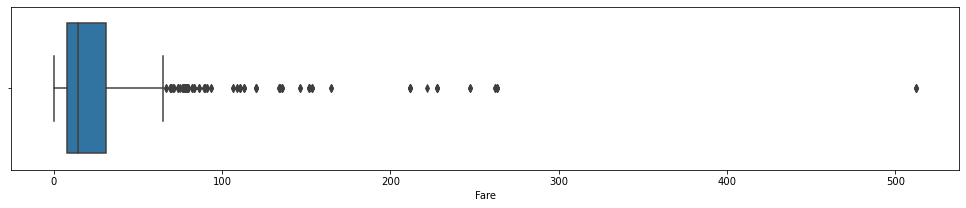

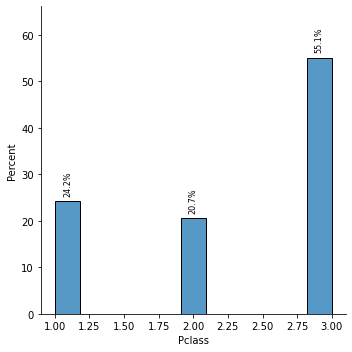

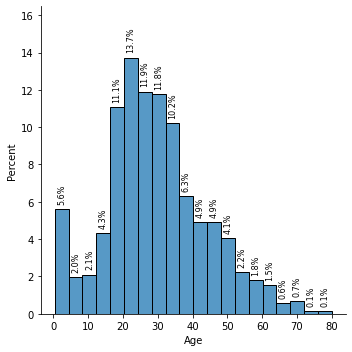

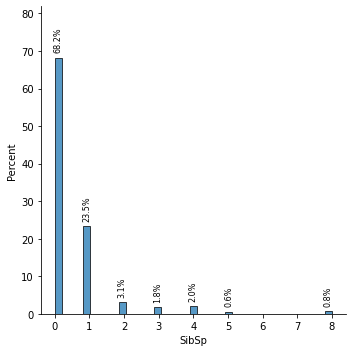

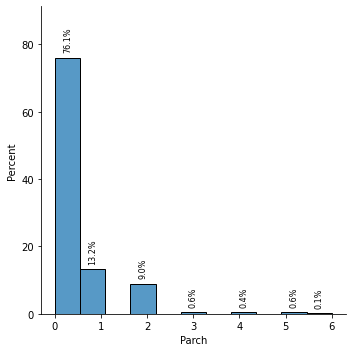

In [117]:
plt.figure(figsize=(17,3))
sns.boxplot(data=train_df, x='Fare')

subplots = [sns.displot(data=train_df, x='Pclass', stat='percent'),
            sns.displot(data=train_df, x='Age', stat='percent'),
            sns.displot(data=train_df, x='SibSp', stat='percent'),
            sns.displot(data=train_df, x='Parch', stat='percent')]

# Добавим проценты над графиком
for plot in subplots: 
    for ax in plot.axes.ravel():
        for c in ax.containers:
            labels = [f'{w:0.1f}%' if (w := v.get_height()) > 0 else '' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=90, padding=5)
        ax.margins(y=0.2)

#plt.tight_layout()
#plt.show()

- Всего у нас 891 примеров или 40% от числа реального количества пассажиров на Титанике (2,224).
- *Survived* - это категориальная фича, которая выражена числами 0 - 1.
- Около 38% примеров будут выражать реальные 32% выживших. Т.е. в нашей тренировочной выборке процент выживших 38%, а в реальности процент выживших был 32%.
- Большинство пассажиров (> 75%) путешествовали без родителей и\или детей (колонка *Parch*).
- Около 30% были со своими братьями, сестрами, супругой или супругом на борту (колонка *SibSp*).
- Цена билета сильно варьируется. Некоторые приобрели очень дорогие билеты (>500), относительно других.
- На борту было очень мало пожилых пассажиров (65+)

In [118]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Как распределены категориальные данные?**

- Каждое имя уникально (count=unique=891)
- Соотношение полов 65% мужчин - 35% женщин.
- Номера кабин повторяются. Несколько человек могли жить в одной кабине.
- *Embarked* - название порта посадки, повторяется три раза. Т.е. пассажиры могли попасть на борт из трех различных портов. Самым частым был порт "S".
- Цена на билет в 22% случаев повторялась. Скорее всего, это цены за место в одной и той же каюте, из одних и тех же портов.

### Предположения на основе Анализа данных

Мы пришли к следующим предположения на основе анализа данных. В дальнейшем, они могут быть подтверждены или опровергнуты.

**Корреляция.**

Нам нужно узнать, как каждый парраметр коррелирует с *Survival*. Позднее, мы соотнесем наши предположения уже с статистической моделью.

**Заполнение пропусков.**

1. Нам обязательно нужно заполнить графу с возратом, т.к. она определенно будет коррелировать с вероятность выживания.
2. Так же нужно заполнить *Embarked*. Т.к. это тоже может коррелировать с вероятностью выживания.

**Корректировка.**

1. *Ticket* может быть исключена из нашего анализа, т.к. имеет высокий процент дубликатов (22%) и, потеницально, слабую корреляцию с выживанием.
2. *Cabin* может быть так же исключена из-за большого колличества пропусков.
3. *PassengerId* нужно исключить. Т.к. это всего лишь индекс в датасете. Он не несет в себе информацию.
4. *Name* относительно нестандартный параметр. Он может коссвенно повлиять на вероятность выживания. Но пока, можно его так же исключить.

**Создание.**

1. Мы можем попробовать создать колонку *Family* на основе *Parch* и *SibSp*. И посчитать количество семей на борту.
2. Мы можем попробовать на основе *Name* создать колонку *Title*, с титулами, соответственно.
3. Мы можем попробовать на основе *Age* создать колонку с времеными промежутками. Это сделает из *Age* категориальный признак.
4. То же самое можно проделать с  *Fare*.

**Предположения.**


1. Большинство женщин (Sex=female), скорее всего, выжили.
2. Все дети (Age<?), скорее всего, выжили.
3. Все пассажиры первого класса (Pclass=1), скорее всего, выжили.

Что бы подтвердить некоторые из наших предположений, мы можем посмотреть корреляцию параметров, просто соотнеся их друг с другом. 

In [119]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [120]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [121]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [122]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- **Pclass** Мы видим серьезную корреляцию (>0.5) между Pclass=1 и Survived. Этот параметр определенно стоит включить в модель.
- **Sex** Мы подтвердили предположение, что среди женщин очень высок процент выживания  74%.
- **SibSp и Parch** Для некоторых значений имею нулевую корреляцию. Возможно, стоит создать на их основе одну или несколько новых колонок.

### Корреляция числовых параметров

Давайте начнем с числовых параметров

Гистограмма полезна для анализа числовых данных, вроде *Age*. С помощью нее можно заметить некоторые паттерны. 

<AxesSubplot:xlabel='Age', ylabel='Proportion'>

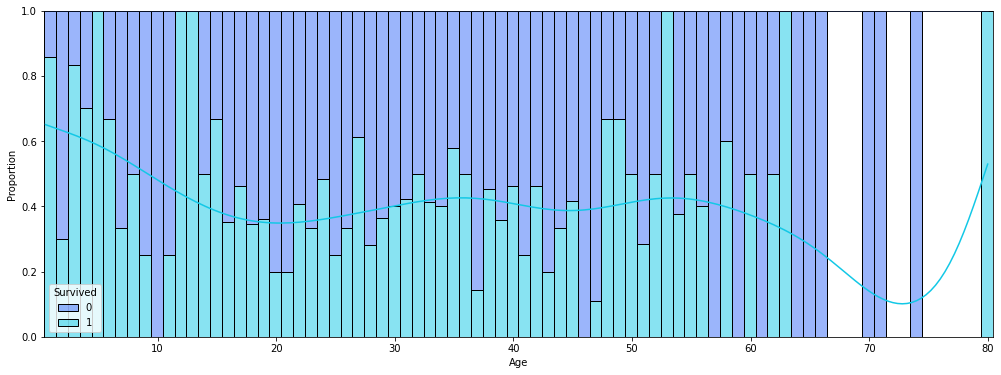

In [73]:
plt.figure(figsize=(17,6))
sns.histplot(data=train_df, x='Age', hue='Survived', stat='proportion', multiple='fill', binwidth=1, kde=True)

**Наблюдения**

- Дети имеют высокий процент выживания
- Самые старые пассажиры выжили
- Большой процент 15-25 летних погибли

**Выводы**

- Возраст сильно коррелирует с вероятностью выживания.
- Если возраст нам важен - мы должны заполнить пропуски в этой колонке
- Возраст можно разбить на возрастные категории, для дальнейшего анализа

### Корреляция числовых и категориальных параметров

Мы можем комбинировать различные фичи на одном графике

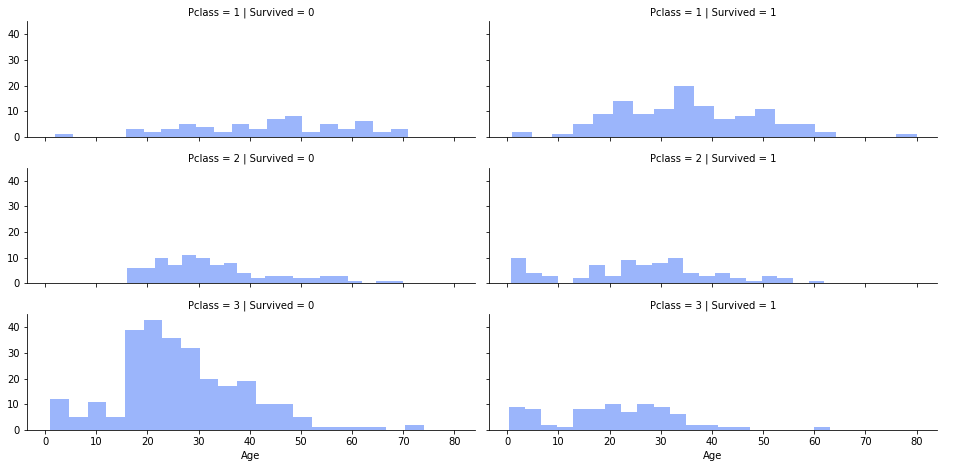

In [74]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=3)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Наблюдения**

- В третьем классе было большинство пассажиров, однако, большинство из них не выжило.
- Большинство пассажиров первого класса выжило.
- Параметр *Pclass* варьируется в зависимости от *Age*. Т.е. люди разного возраста выбирают разный класс.

**Выводы**

- *Pclass* следует использовать при тренировки модели

А теперь посмотрим как коррелирует *Embarked*, *Sex*, *Fare*, c *Survived*.

**Наблюдения**

- Пассажиры классом выше имеют больший шанс выжить. Мы были правы в наших предположениях.
- Порт посадки коррелирует с вероятностью выжить. Это предположение так же подтвердилось.

**Выводы**

- *Fare* следует использовать при тренировки модели

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


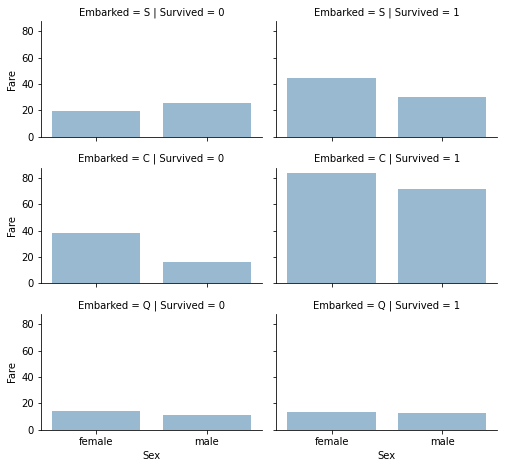

In [217]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

### Корреляция категориальных параметров

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


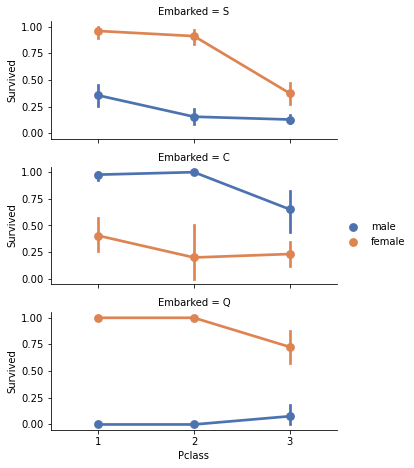

In [220]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=2.2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Наблюдения**

- Женщины имееют намного большую вероятность выживания, нежели мужчины.
- Исклюечение составляет Embarked=C, где мужчины выживали чаще. Это может коррелировать с *Pclass*.
- Мужчины имеют лучшие шансы выжить в Pclass=3, в сравнении с Pclass=2 относительно портов C и Q.
- Вероятность выживания мужчины, севшего в разных портах, сильно варъируется для Pclass=3.

**Выводы**

- *Sex* следует использовать при тренировки модели
- *Embarked* следует использовать при тренировки модели, предвратильно заполнив пропуски в этой колонки

## Обработка данных

Мы сделали несколько предположений и на выводов на основе анализа данных. Теперь пришло время притворить всё это в жизнь. Отредактируем исходный датасет.

### Корректировка путем удаления колонок

Это хорошая стартовая точка. Отбросим всё не нужное, что бы в дальнейшем работать с уменьшеным набором. Его и глазами легче осматривать, и компьютеру нужно меньше ресурсов на выполнение операций.

Основывая на наших догадках, мы можем удалить колонки *Cabin* и *Ticket*.
А *PassengerId* нам и вовсе не нужна.

**Заметьте, что мы делаем это и для тренировочного, и для тестового набора**

In [90]:
print("До удаления", train_df.shape, test_df.shape)

for dataset in combine:
    dataset.drop(['Ticket', 'Cabin', 'PassengerId'], axis=1, inplace = True)

print("После удаления", train_df.shape, test_df.shape)

print("P.S. в тесте на одну колонку меньше. Отсутствует колонка Выживания. Т.к. ее мы и предсказываем.")

До удаления (891, 12) (418, 11)
После удаления (891, 9) (418, 8)
P.S. в тесте на одну колонку меньше. Отсутствует колонка Выживания. Т.к. ее мы и предсказываем.


### Создание новых параметров на основе существующих

Мы хотим узнать, если ли из колонки *Name* извлечь титул - будет ли он коррелировать с вероятность выживания?


В коде ниже мы создаем новый параметр *Title* используя Регулярные выражения (regular expressions). Мы возьмем имя и извлечем подстроку до точки. Это и будет титулом.

**Предположения**

Давайте исследуем зависимости *Title*, *Age*, и *Survived*. Еще до анализа, можно предположить:

- Титул будет коррелировать с возрастом. Чем дольше человек живет - тем больше у него может быть заслуг. 
- Вероятность выживания будет немного варьироваться от титула к титулу. Более статные, скорее всего, приобретали более дорогие билеты. А как мы уже выяснили, класс билета влияет на вероятность выживания. 
- Люди с определенными титулами (Mme, Lady, Sir), скорее всего, имели больший шанс на выживание, относительно других титулов (Don, Rev, Jonkheer).

**Решение**

- Создать колонку с титулом на основе имени

In [91]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


<AxesSubplot:xlabel='Title', ylabel='Age'>

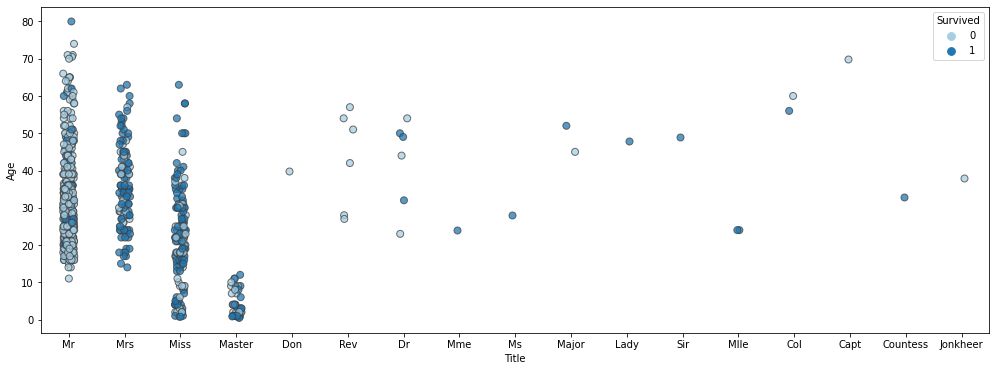

In [92]:
plt.figure(figsize=(17,6))
sns.stripplot(data=train_df, x='Title', y='Age', hue='Survived', linewidth=1, alpha=.75, size=7)

<AxesSubplot:xlabel='Title', ylabel='Proportion'>

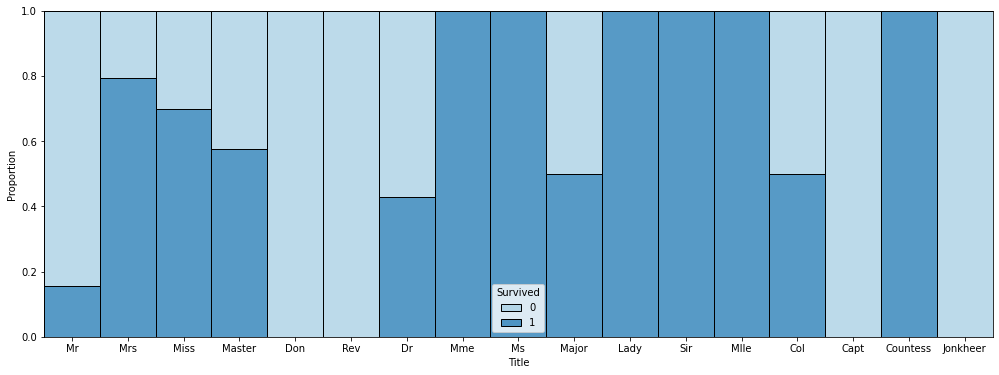

In [93]:
#sns.catplot(data=train_df, x='Survived', col='Title', kind="count")
sns.set_palette('Paired')

plt.figure(figsize=(17,6))
sns.histplot(data=train_df, x='Title', hue='Survived', stat='proportion', multiple='fill', binwidth=1)

Посмотрите на распределение титулов по половому признаку и распространненость титула как такового.
Можно заменить некоторые титулы на более распространенные или просто определить их как `Rare`.

In [94]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


А теперь закодируем наш категориальный признак с титулами цифрами. Для освобождения вычислительных ресурсов. Так же этот шаг будет наобходим, когда мы будем тренировать модель машинного обучения. Они, зачастую, любят только цифры.

In [95]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0) # Для людей без титула в Name

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Теперь мы можем безопасно удалить *Name* из датасета

In [96]:
for dataset in combine:
    dataset.drop(['Name'], axis=1, inplace = True)

train_df.shape, test_df.shape

((891, 9), (418, 8))

### Конвертация категориальных признаков.

Проделаем то же самое с колонкой *Sex*. Закодируем её 0 и 1.

In [97]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Заполнение пропусков 

Пришла пора разобраться с пропусками. Начнем с колонки возраста.

У нас есть несколько путей решения этой задачи:

1. Простой способ - это сгенерировать случайные значения между средним значением и [среднеквадратичным отклонением](https://ru.wikipedia.org/wiki/Среднеквадратическое_отклонение).

2. Более тонкий подход - это использовать другие коррелирующие параметры для предсказания. В нашем случае,  *Age*, *Gender*, и *Pclass*. Предсказать [медианое](https://ru.wikipedia.org/wiki/Медиана_(статистика)) значение для *Age* среди комбинаций *Pclass* и *Sex*. Медиана *Age* для Pclass=1 и Sex=0; Медиана *Age* для Pclass=1  и Gender=1, и т.д...

3. Комбинация 1 и 2 метода. Таким образом, что вместо предсказания возраста на основе медианы, использовать случайные числа, между средним значением и среднеквадратичным отклонением, основанными на комбинациях *Pclass* и *Sex*.

Первый и третий способ внесет случайный шум в наши данный. Результат экспериментов с такими данными будет варьироваться (числа ведь случайные). 

**Мы выберем второй метод**

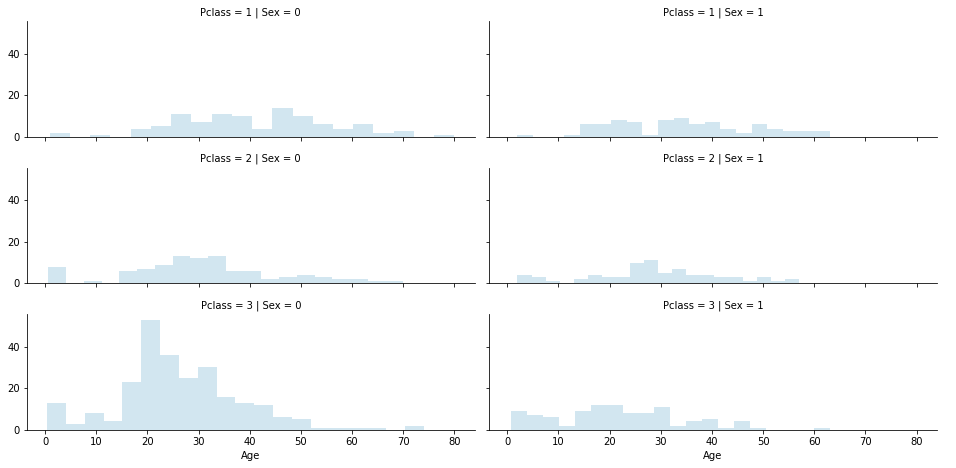

In [102]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=3)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Начнем с подготовки пустого массива, где будем хранить предсказания для возраста на основе *Pclass* и *Sex*

In [103]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Теперь мы пройдемся циклами по *Sex* (0 или 1) и *Pclass* (1, 2, 3) что бы вычислить возраст во всех (6) возможных комбинациях

In [104]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


We can not remove the AgeBand feature.

In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### Completing a categorical feature

Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


We can not create FareBand.

In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


And the test dataset.

In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

In [40]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [41]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
- Inversely as Pclass increases, probability of Survived=1 decreases the most.
- This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
- So is Title as second highest positive correlation.

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


Next we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

KNN confidence score is better than Logistics Regression but worse than SVM.

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

The model generated confidence score is the lowest among the models evaluated so far.

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.0

In [47]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.12

In [48]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.56

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

The model confidence score is the highest among models evaluated so far.

In [49]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.

In [50]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### Model evaluation

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set. 

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.12
6,Stochastic Gradient Decent,78.56
5,Perceptron,78.00
4,Naive Bayes,72.28


In [52]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

Our submission to the competition site Kaggle results in scoring 3,883 of 6,082 competition entries. This result is indicative while the competition is running. This result only accounts for part of the submission dataset. Not bad for our first attempt. Any suggestions to improve our score are most welcome.